# FashionReviewer Python Code

## By Jingting Zhang, Oct 8, 2018

In [13]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow

%matplotlib inline
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import re
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN

import os

# title

## subtitle

### and so on

## Data Import & Visualization

In [4]:
path="/Users/jingtingzhang/Documents/Insight2018_2/scripts/Womens Clothing E-Commerce Reviews.csv"
df=pd.read_csv(path)
#print(ecommerce_data)
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


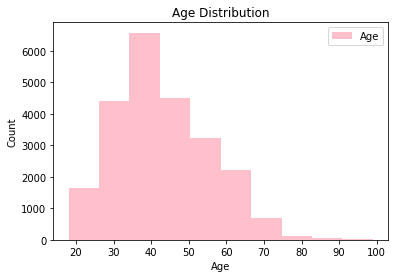

In [7]:
# The age distribution in data
plt.hist(df['Age'], color="pink", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.savefig("Age Distribution.png")

# remove frame from plt

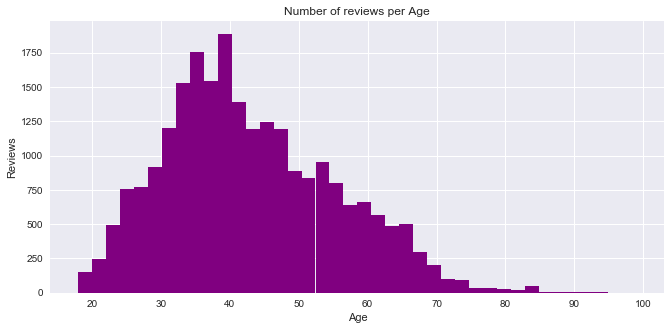

In [8]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(df.Age, bins=40,  color="purple")
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');
plt.savefig("Number of reviews per Age.png")

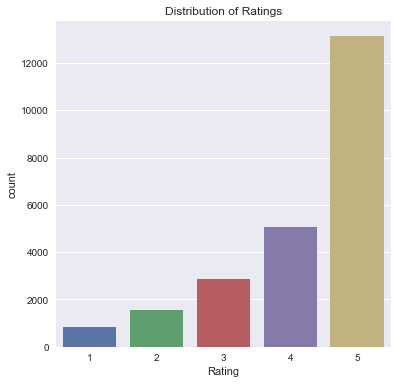

In [9]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Ratings')
sns.countplot(x = 'Rating', data = df);
plt.savefig("Distribution of Ratings.png")

In [10]:
recommended = df[df['Recommended IND']==1]
not_recommended = df[df['Recommended IND']==0]

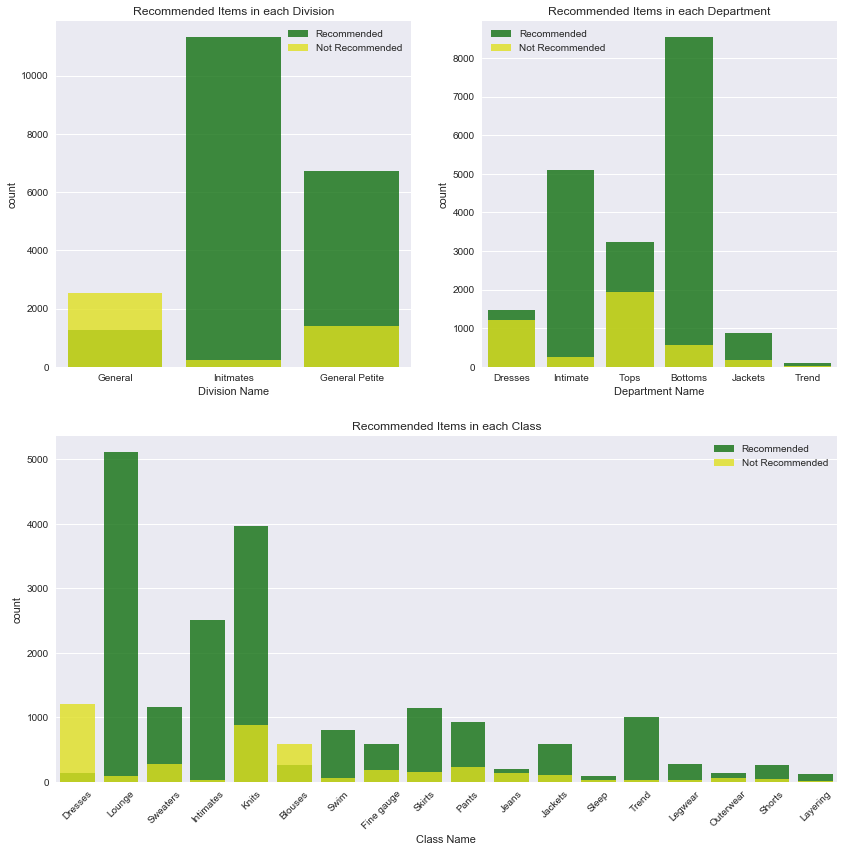

In [11]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division Name'], color = "green", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division Name'], color = "yellow", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Department Name'], color="green", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Department Name'], color="yellow", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="green", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="yellow", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()
plt.savefig("Recommended Items in each Division or Class.png")

In [ ]:
df['Review Length'] = df['Review Text'].astype(str).apply(len)
df.head()

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(df['Review Length'], color="green", bins=40, kde=False)
ax = plt.title("Review Length")
plt.savefig("Review Length.png")

In [ ]:
df['Review Length'] = df['Review Text'].astype(str).apply(len)
df.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Department Name', y = 'Rating', data = df)
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Department Name', y = 'Review Length', data = df)

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Review Length by Class')
sns.boxplot(x = 'Class Name', y = 'Review Length', data = df);
plt.savefig("Review Length by Class.png")

In [ ]:
ps = PorterStemmer()
Reviews = df['Review Text'].astype(str)
print(Reviews.shape)
Reviews[Reviews.isnull()] = "NULL"

In [ ]:
#import sys
#!{sys.executable} -m pip install summa

In [ ]:
# import spacy

# nlp = spacy.load('')
# doc = nlp(u"Autonomous cars shift insurance liability toward manufacturers")
# for token in doc:
#     print(token.text, token.dep_, token.head.text, token.head.pos_,
#           [child for child in token.children])

## Keyword detection

### Pre-processing: tokenize, remove keywords, lemmatize

In [ ]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{3,}')

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [ ]:
!{sys.executable} -m pip install gensim

In [ ]:
import gensim
from gensim.summarization import graph
from gensim.summarization import keywords

In [ ]:
# The txt file should not contain quotes or paragraph separating functions (soft cap would work) #
with open('review_text_4.txt', 'r') as tfile:
    txt = tfile.read()

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} gensim

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(txt, scores, data = df)

In [ ]:
def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    return words

In [ ]:
df['tokenized']=df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized']=df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized']=df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row


In [ ]:
def string_unlist(strlist):
    return " ".join(strlist)

df["tokenized_unlist"] = df["tokenized"].apply(string_unlist)
df.head()

In [ ]:
# # for sentence in review:
# #     word=sentence.split(' ')
#     for word in sentences:
#         word2vec = Word2Vec(sentences=review,
#                     size=vector_size, 
#                     window=window_size, 
#                     negative=20,
#                     iter=50,
#                     seed=1000)  
# #         print(word)
# word2vec.save(model_location + 'word2vec.model')

In [ ]:
print(gensim.summarization.keywords(tokenized_unlist, ratio=0.2, words=None, split=False, scores=True, 
                                       pos_filter=('NN', 'JJ'), lemmatize=True, deacc=True))

## Word2Vec

In [ ]:
model_location = '/Users/jingtingzhang/Documents/Insight2018_2/scripts/'
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit = 1000000)

In [ ]:
w1="size"
model.wv.most_similar(positive=w1)

In [ ]:
w2="color"
model.wv.most_similar(positive=w2)

In [ ]:
import multiprocessing
from scipy import spatial

In [ ]:
index2word_set = set(model.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
sim_size=[]
w1="size"
w1_afv = avg_feature_vector(w1, model=model, num_features=300, index2word_set=index2word_set)
for sentence in df['tokenized_unlist']:
    sentence_afv = avg_feature_vector(sentence, model=model, num_features=300, index2word_set=index2word_set)
    sim_size.append(1 - spatial.distance.cosine(sentence_afv, w1_afv)) 
df['sim_size']=pd.Series(sim_size)
print(df['sim_size'])

In [ ]:
sim_color=[]
w2="color"
w2_afv = avg_feature_vector(w2, model=model, num_features=300, index2word_set=index2word_set)
for sentence in df['tokenized_unlist']:
    sentence_afv = avg_feature_vector(sentence, model=model, num_features=300, index2word_set=index2word_set)
    sim_color.append(1 - spatial.distance.cosine(sentence_afv, w2_afv)) 
df['sim_color']=pd.Series(sim_color)
print(df.sim_color)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=400, background_color="white").generate(txt)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
# plt.show()
plt.savefig("plot_wordcloud_keywords.png")

In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np
count = len(df)
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in model.vocab:
    word_vectors_matrix[i] = model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

In [ ]:
#Compress word vectors into 2D space
import sklearn.decomposition
pca= sklearn.decomposition.PCA(n_components=2, random_state=0)
word_vectors_matrix_2d = pca.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

In [ ]:
for i in df.index:
    if  -0.05 < (sim_size[i]-sim_color[i]) < 0.05:
        df.loc[i, 'clothingfeature']='both'
    elif (sim_size[i]-sim_color[i]) > 0.05:
        df.loc[i, 'clothingfeature']='size'
    else:
        df.loc[i, 'clothingfeature']='color'

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
df['Polarity Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [ ]:
conditions = [
    df['Sentiment'] == "Positive",
    df['Sentiment'] == "Negative",
    df['Sentiment'] == "Neutral"]
choices = [1,-1,0]
df['label'] = np.select(conditions, choices)
pd.set_option('display.max_columns', 100)
df.head()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'clothingfeature', y = 'Polarity Score', data = df)

In [ ]:
df_color=df[df.loc[:, 'clothingfeature']=='color']

In [ ]:
df_size=df[df.loc[:, 'clothingfeature']=='size']

In [ ]:
############ Train df_color ###############
samples = df_color["tokenized_unlist"].tolist()
maxlen = 100 
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
labels = np.asarray(df_color["label"].values)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

In [ ]:
indices = np.arange(df_color.shape[0])
np.random.shuffle(indices)
print(indices)

In [ ]:
data = data[indices]
labels = labels[indices]
print(data)

In [ ]:
training_samples = 5871
validation_samples = 8807 #2936
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: validation_samples] 
y_val = labels[training_samples: validation_samples]
x_test = data[validation_samples:]
y_test = labels[validation_samples:]
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
#return x_train

In [ ]:
def build_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
    return model

model = build_model()
model.summary()
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=40,
                    validation_data=(x_val, y_val))

model.save("model1.h5")

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#df.set_index('epochs').plot()
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlim((1,5))
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

### RNN Model for Size

In [ ]:
######################## RNN ########################
def build_RNN():
    model = Sequential() 
    model.add(Embedding(max_words, 100, input_length=maxlen)) 
    #model.add(SimpleRNN(32, return_sequences=True))
    model.add(SimpleRNN(32)) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
    return model

model = build_RNN()
model.summary()
history_RNN = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=40,
                    validation_data=(x_val, y_val))

model.save("model_RNN.h5")

In [ ]:
acc = history_RNN.history['acc']
val_acc = history_RNN.history['val_acc']
loss = history_RNN.history['loss']
val_loss = history_RNN.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.xlim((1,5))
plt.show()


In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
############ Train df_size ###############
samples = df_size["tokenized_unlist"].tolist()
maxlen = 100 
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
labels = np.asarray(df_size["label"].values)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

In [ ]:
indices = np.arange(df_size.shape[0])
np.random.shuffle(indices)
print(indices)

In [ ]:
data = data[indices]
labels = labels[indices]
print(data)

In [ ]:
training_samples = 5871
validation_samples = 8807
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: validation_samples] 
y_val = labels[training_samples: validation_samples]
x_test = data[validation_samples:]
y_test = labels[validation_samples:]
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
#return x_train

In [ ]:
def build_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
    return model

model = build_model()
model.summary()
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=40,
                    validation_data=(x_val, y_val))

model.save("model1.h5")

In [ ]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=40,
                    validation_data=(x_val, y_val))

model.save("model1.h5")

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#df.set_index('epochs').plot()
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlim((1,5))
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

### RNN Model for Size

In [ ]:
######################## RNN ########################
def build_RNN():
    model = Sequential() 
    model.add(Embedding(max_words, 100, input_length=maxlen)) 
    #model.add(SimpleRNN(32, return_sequences=True))
    model.add(SimpleRNN(32)) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
    return model

model = build_RNN()
model.summary()
history_RNN = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=40,
                    validation_data=(x_val, y_val))

model.save("model_RNN.h5")

In [ ]:
acc = history_RNN.history['acc']
val_acc = history_RNN.history['val_acc']
loss = history_RNN.history['loss']
val_loss = history_RNN.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.xlim((1,5))
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

### END